In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('/content/생필품농수축산물가격정보(2019년).csv', encoding = 'cp949')
df2 = pd.read_csv('/content/생필품농수축산물가격정보(2020년).csv', encoding = 'cp949')
df3 = pd.read_csv('/content/생필품농수축산물가격정보(2021년).csv', encoding = 'cp949')

In [3]:
df_one = pd.merge(df1, df2, how = 'outer')

In [4]:
df = pd.merge(df_one, df3, how = 'outer')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320843 entries, 0 to 320842
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   일련번호               320843 non-null  int64 
 1   시장/마트 번호           320843 non-null  int64 
 2   시장/마트 이름           320843 non-null  object
 3   품목 번호              320843 non-null  int64 
 4   품목 이름              320787 non-null  object
 5   실판매규격              320843 non-null  object
 6   가격(원)              320843 non-null  int64 
 7   년도-월               320843 non-null  object
 8   비고                 253682 non-null  object
 9   시장유형 구분(시장/마트) 코드  320843 non-null  int64 
 10  시장유형 구분(시장/마트) 이름  320843 non-null  object
 11  자치구 코드             320843 non-null  int64 
 12  자치구 이름             320843 non-null  object
 13  점검일자               320843 non-null  object
dtypes: int64(6), object(8)
memory usage: 36.7+ MB


In [6]:
df.describe(include='O')

,시장/마트 이름,품목 이름,실판매규격,년도-월,비고,시장유형 구분(시장/마트) 이름,자치구 이름,점검일자
count,320843,320787,320843,320843,253682,320843,320843,320843
unique,107,86,7559,35,25496,2,25,75
top,이마트 목동점,달걀(10개),1개,2020-11,국내산,대형마트,중구,2020-07-30
freq,3413,18337,64614,15003,34749,163653,19528,14797


In [7]:
df.columns

Index(['일련번호', '시장/마트 번호', '시장/마트 이름', '품목 번호', '품목 이름', '실판매규격', '가격(원)',
       '년도-월', '비고', '시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름', '자치구 코드',
       '자치구 이름', '점검일자'],
      dtype='object')

In [8]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [9]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['font.family'] = 'NanumGothic'

In [10]:
region_name = df['자치구 이름']
region_code = df['자치구 코드']
region = {}
for i in range(len(region_code)):
  region[region_code[i]] = region_name[i]
print(region)

{545000: '금천구', 680000: '강남구', 560000: '영등포구', 740000: '강동구', 410000: '서대문구', 230000: '동대문구', 500000: '강서구', 440000: '마포구', 140000: '중구', 305000: '강북구', 710000: '송파구', 260000: '중랑구', 215000: '광진구', 320000: '도봉구', 590000: '동작구', 170000: '용산구', 470000: '양천구', 290000: '성북구', 650000: '서초구', 530000: '구로구', 620000: '관악구', 350000: '노원구', 110000: '종로구', 200000: '성동구', 380000: '은평구'}


In [11]:
food_name = df['품목 번호']
food_code = df['품목 이름']
food = {}
for j in range(len(food_code)):
  food[food_code[j]] = food_name[j]
print(food)

{'오이(다다기)': 311, '돼지고기(생삼겹살)': 202, '상추(100g)': 310, '쇠고기(한우,불고기)': 58, '양파(1.5kg망)': 309, '호박(인큐베이터)': 119, '조기(냉동,수입산)': 260, '닭고기(육계)': 283, '달걀(10개)': 171, '달걀(30개)': 320, '조기(국산,생물)': 136, '명태(냉동,수입산)': 264, '고등어(30cm,수입산)': 318, '사과(부사, 300g)': 305, '오징어(생물,국산)': 254, '고등어(생물,국산)': 266, '명태(러시아,냉동)': 152, '배(신고, 600g)': 306, '무(1kg)': 308, '배추(2.5~3kg)': 307, '애호박': 312, '조기(국산,냉동)': 144, '고등어(냉동,국산)': 268, '배(신고),중급(대)': 248, '배추(국산)': 125, '배추': 26, '양파': 24, '무': 25, '배(신고)': 276, '조기': 303, '동태': 288, '상추': 23, '오징어(냉동,국산)': 256, '고등어': 304, '배': 27, '오징어(냉동,수입산)': 257, '돼지고기(삼겹살)': 52, '닭고기': 18, '돼지고기': 285, '쇠고기(한우1등급)': 99, '사과(부사)': 50, '호박': 277, '닭고기(토종닭)': 138, '사과(부사),중급(대)': 237, '고등어(냉동,수입산)': 269, '조기(냉동,국산)': 259, '배추(중간)': 271, '배(중품)': 284, '오이': 22, '냉동참조기(20cm,국산)': 314, '명태(생물,수입산)': 265, '오징어': 253, '명태': 302, '달걀': 17, '쇠고기': 278, '무(세척무)': 133, '무(세척무, 중)': 274, '조기(생물,수입산)': 261, '고등어(30cm,국산)': 316, '호박(인큐베이터),중간': 118, '조기(생물,국산)': 258, '닭고기(중간)': 275,

In [12]:
mart_name = df['시장/마트 번호']
mart_code = df['시장/마트 이름']
mart = {}
for k in range(len(mart_code)):
  mart[mart_code[k]] = mart_name[k]
print(mart)

{'홈플러스 시흥점': 116, '남문시장': 115, '현대시장': 114, '홈플러스 독산점': 222, '이마트 역삼점': 44, '롯데백화점 영등포점': 130, '홈플러스 강동점': 154, '인왕시장': 31, '롯데백화점 청량리점': 88, '롯데백화점 강남점': 45, '화곡본동시장': 213, '홈플러스 월드컵점': 123, '롯데마트 서울역점': 8, '수유재래시장': 66, '이마트 명일점': 153, '롯데백화점 잠실점': 147, '동원시장': 91, '홈플러스 등촌점': 40, '이마트 자양점': 80, '이마트 창동점': 27, '남성시장': 127, '용문시장': 10, '목3동시장': 102, '이마트 목동점': 214, '우림시장': 90, '돈암제일시장': 13, '방림시장': 217, '망원시장': 120, '암사종합시장': 151, '홈플러스 방학점': 28, '이마트 여의도점': 22, '대림중앙시장': 19, '롯데백화점': 56, '신세계백화점 강남점': 218, '남구로시장': 108, '하나로클럽 양재점': 140, '원당종합시장': 133, '방학동도깨비시장': 25, '현대백화점 신촌점': 33, '남대문시장': 11, '신영시장': 103, '공릉동 도깨비시장': 96, '롯데마트 강변점': 82, '영천시장': 32, '홈플러스 잠실점': 148, '통인시장': 1, '신창시장': 26, '신세계백화점': 2, '태평백화점': 129, '하나로클럽 미아점': 206, '이마트 미아점': 15, '세이브 마트': 136, '홈플러스 면목점': 94, '이마트 청계점': 60, '영등포전통시장': 20, '도곡시장': 216, '마천중앙시장': 145, '신원시장(신림1동)': 134, '홈플러스 영등포점': 21, '관악신사시장(신림4동)': 207, '청담삼익시장': 215, '이마트 왕십리점': 74, '송화시장': 38, '뉴코아아울렛 강남점': 200, '장위골목시장': 14, '이마트 용산점': 6,

In [13]:
df.drop('자치구 이름',axis=1, inplace = True)
df.drop('시장/마트 이름',axis=1, inplace = True)
df.drop('시장유형 구분(시장/마트) 코드',axis=1, inplace = True)
df.drop('시장유형 구분(시장/마트) 이름',axis=1, inplace = True)
df.drop('비고',axis=1, inplace = True)
df.drop('점검일자',axis=1, inplace = True)
df.drop('실판매규격',axis=1, inplace = True)

In [14]:
df.drop('품목 이름',axis=1, inplace = True)

In [15]:
df.drop('일련번호',axis=1, inplace = True)

In [16]:
df['년도-월'] = pd.to_datetime(df['년도-월'])
df

,시장/마트 번호,품목 번호,가격(원),년도-월,자치구 코드
0,116,311,1190,2019-12-01,545000
1,115,202,12500,2019-12-01,545000
2,115,310,800,2019-12-01,545000
3,115,58,23000,2019-12-01,545000
4,115,309,2500,2019-12-01,545000
...,...,...,...,...,...
320838,154,320,6490,2021-12-01,740000
320839,154,144,1190,2021-12-01,740000
320840,154,264,3490,2021-12-01,740000
320841,154,256,4980,2021-12-01,740000


In [17]:
df = df.sort_values(by='가격(원)')
df

,시장/마트 번호,품목 번호,가격(원),년도-월,자치구 코드
234816,147,302,0,2021-01-01,710000
222105,154,264,0,2020-01-01,740000
180372,44,288,0,2020-07-01,680000
111459,129,152,0,2019-02-01,590000
180353,44,288,0,2020-07-01,680000
...,...,...,...,...,...
148594,10,256,310000,2020-10-01,170000
25965,94,306,403890,2019-11-01,260000
139423,223,288,34902990,2020-10-01,470000
127610,214,13,35002980,2020-11-01,470000


In [18]:
df = df.iloc[3695:,:]
df

,시장/마트 번호,품목 번호,가격(원),년도-월,자치구 코드
70063,213,119,10,2019-07-01,500000
261572,214,312,90,2021-05-01,470000
243730,102,25,100,2021-02-01,470000
65247,146,310,100,2019-08-01,710000
87660,114,311,100,2019-06-01,545000
...,...,...,...,...,...
148594,10,256,310000,2020-10-01,170000
25965,94,306,403890,2019-11-01,260000
139423,223,288,34902990,2020-10-01,470000
127610,214,13,35002980,2020-11-01,470000


In [19]:
df = df.iloc[:317145,:]
df

,시장/마트 번호,품목 번호,가격(원),년도-월,자치구 코드
70063,213,119,10,2019-07-01,500000
261572,214,312,90,2021-05-01,470000
243730,102,25,100,2021-02-01,470000
65247,146,310,100,2019-08-01,710000
87660,114,311,100,2019-06-01,545000
...,...,...,...,...,...
244208,45,50,210000,2021-02-01,680000
179632,40,58,260520,2020-07-01,500000
92710,63,58,288200,2019-05-01,170000
148594,10,256,310000,2020-10-01,170000


In [20]:
df = df.sort_values(by='가격(원)')
df = df.iloc[:317145,:]
df

,시장/마트 번호,품목 번호,가격(원),년도-월,자치구 코드
70063,213,119,10,2019-07-01,500000
261572,214,312,90,2021-05-01,470000
34530,205,310,100,2019-10-01,740000
244482,102,25,100,2021-02-01,470000
64851,145,119,100,2019-08-01,710000
...,...,...,...,...,...
244208,45,50,210000,2021-02-01,680000
179632,40,58,260520,2020-07-01,500000
92710,63,58,288200,2019-05-01,170000
148594,10,256,310000,2020-10-01,170000


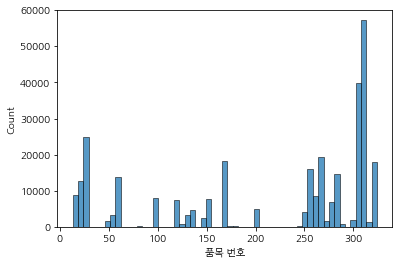

In [21]:
sns.histplot(data=df, x='품목 번호')

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [23]:
from sklearn.model_selection import KFold

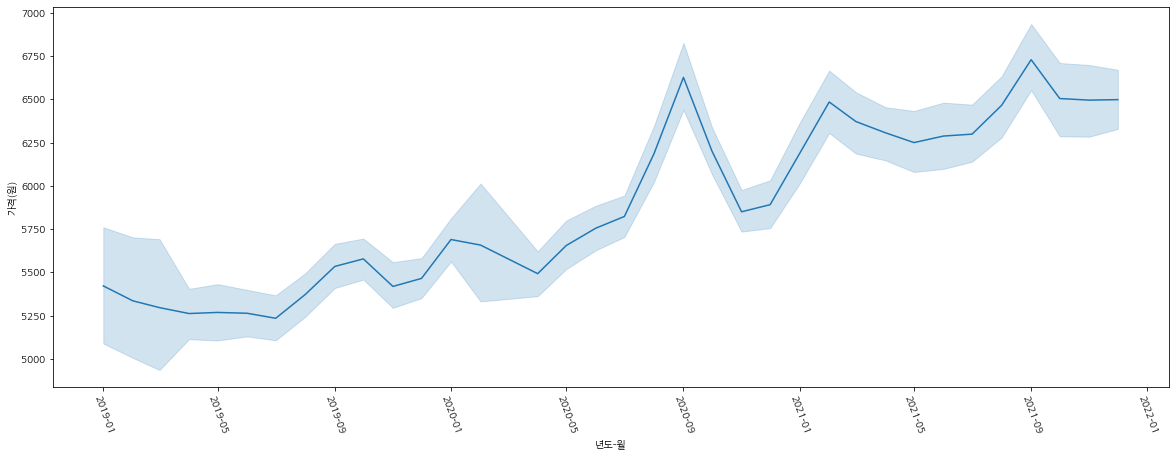

In [24]:
plt.figure(figsize = (20,7))
plt.xticks(rotation = -70 )
sns.lineplot(data = df, x='년도-월', y = '가격(원)')

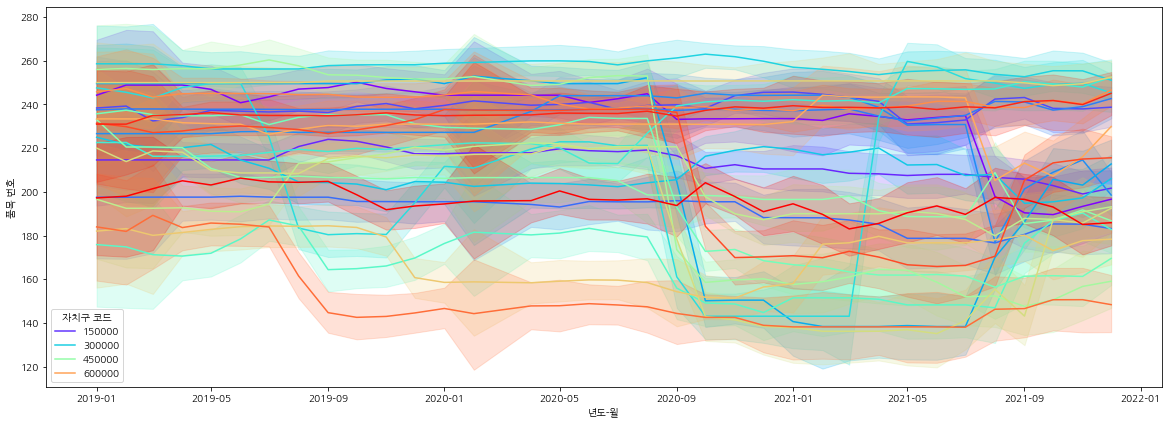

In [25]:
plt.figure(figsize = (20,7))
sns.lineplot(data = df, x='년도-월', y = '품목 번호', hue='자치구 코드', palette='rainbow')
plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317145 entries, 70063 to 25965
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   시장/마트 번호  317145 non-null  int64         
 1   품목 번호     317145 non-null  int64         
 2   가격(원)     317145 non-null  int64         
 3   년도-월      317145 non-null  datetime64[ns]
 4   자치구 코드    317145 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 22.6 MB


In [27]:
df

,시장/마트 번호,품목 번호,가격(원),년도-월,자치구 코드
70063,213,119,10,2019-07-01,500000
261572,214,312,90,2021-05-01,470000
34530,205,310,100,2019-10-01,740000
244482,102,25,100,2021-02-01,470000
64851,145,119,100,2019-08-01,710000
...,...,...,...,...,...
244208,45,50,210000,2021-02-01,680000
179632,40,58,260520,2020-07-01,500000
92710,63,58,288200,2019-05-01,170000
148594,10,256,310000,2020-10-01,170000


# DecisionTree Regressor

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

In [29]:
X = df.drop('년도-월', axis=1)
y = df['년도-월']
X, y

(        시장/마트 번호  품목 번호   가격(원)  자치구 코드
 70063        213    119      10  500000
 261572       214    312      90  470000
 34530        205    310     100  740000
 244482       102     25     100  470000
 64851        145    119     100  710000
 ...          ...    ...     ...     ...
 244208        45     50  210000  680000
 179632        40     58  260520  500000
 92710         63     58  288200  170000
 148594        10    256  310000  170000
 25965         94    306  403890  260000
 
 [317145 rows x 4 columns], 70063    2019-07-01
 261572   2021-05-01
 34530    2019-10-01
 244482   2021-02-01
 64851    2019-08-01
             ...    
 244208   2021-02-01
 179632   2020-07-01
 92710    2019-05-01
 148594   2020-10-01
 25965    2019-11-01
 Name: 년도-월, Length: 317145, dtype: datetime64[ns])

In [30]:
df['년도-월'] = df['년도-월'].dt.month

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317145 entries, 70063 to 25965
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   시장/마트 번호  317145 non-null  int64
 1   품목 번호     317145 non-null  int64
 2   가격(원)     317145 non-null  int64
 3   년도-월      317145 non-null  int64
 4   자치구 코드    317145 non-null  int64
dtypes: int64(5)
memory usage: 22.6 MB


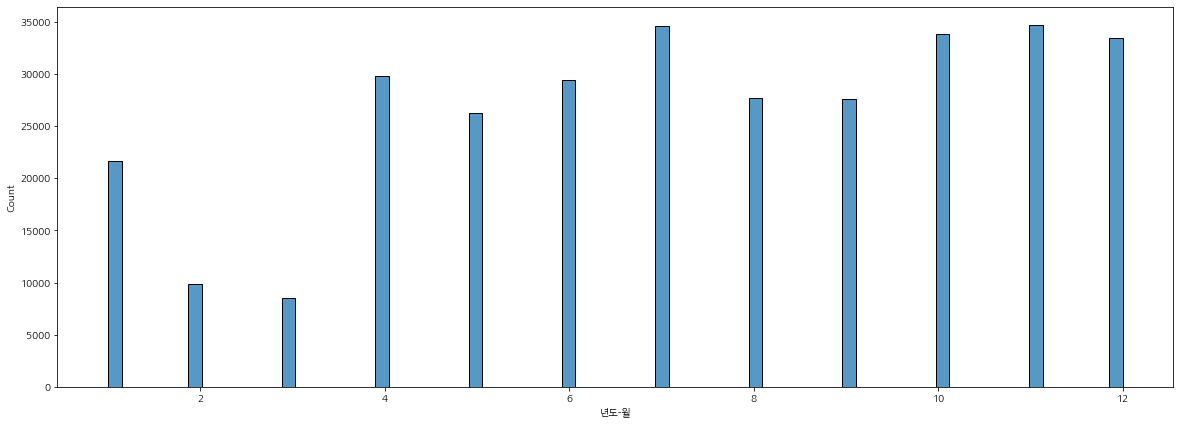

In [32]:
plt.figure(figsize = (20,7))
sns.histplot(data=df, x='년도-월')

RandomForest Regressor

훈련셋 & 시험셋

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317145 entries, 70063 to 25965
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   시장/마트 번호  317145 non-null  int64
 1   품목 번호     317145 non-null  int64
 2   가격(원)     317145 non-null  int64
 3   년도-월      317145 non-null  int64
 4   자치구 코드    317145 non-null  int64
dtypes: int64(5)
memory usage: 22.6 MB


In [35]:
X = df.drop('년도-월', axis=1)
y = df['년도-월']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=22
)

모델링

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
model = RandomForestRegressor(random_state=22)

In [39]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=22)

In [40]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error

print(
    f"train_rmse : {mean_squared_error(y_train, train_pred, squared=False)}",
    f"test_rmse : {mean_squared_error(y_test, test_pred, squared=False)}",
)

train_rmse : 2.60558142696811 test_rmse : 2.949055944265961


K-Fold

In [42]:
from sklearn.model_selection import KFold

In [43]:
df.index

Int64Index([ 70063, 261572,  34530, 244482,  64851,  98772,  65247, 243730,
             87660,  17180,
            ...
            136318,  28357, 279554,  15267, 228853, 244208, 179632,  92710,
            148594,  25965],
           dtype='int64', length=317145)

In [44]:
df.reset_index() # 인덱스가 열로 빠져나오고, 정수 인덱스가 새로 지정됨
df.reset_index(drop=True) # 인덱스가 바로 삭제되고, ...
df.reset_index(drop=True, inplace=True)

In [45]:
df.index

RangeIndex(start=0, stop=317145, step=1)

In [46]:
kf = KFold(n_splits=5)

In [47]:
X = df.drop('년도-월', axis=1)
y = df['년도-월']

In [48]:
list(kf.split(X))

[(array([ 63429,  63430,  63431, ..., 317142, 317143, 317144]),
  array([    0,     1,     2, ..., 63426, 63427, 63428])),
 (array([     0,      1,      2, ..., 317142, 317143, 317144]),
  array([ 63429,  63430,  63431, ..., 126855, 126856, 126857])),
 (array([     0,      1,      2, ..., 317142, 317143, 317144]),
  array([126858, 126859, 126860, ..., 190284, 190285, 190286])),
 (array([     0,      1,      2, ..., 317142, 317143, 317144]),
  array([190287, 190288, 190289, ..., 253713, 253714, 253715])),
 (array([     0,      1,      2, ..., 253713, 253714, 253715]),
  array([253716, 253717, 253718, ..., 317142, 317143, 317144]))]

In [49]:
for i, j in kf.split(X):
    print(f"i : {i}")
    print(f"j : {j}")

i : [ 63429  63430  63431 ... 317142 317143 317144]
j : [    0     1     2 ... 63426 63427 63428]
i : [     0      1      2 ... 317142 317143 317144]
j : [ 63429  63430  63431 ... 126855 126856 126857]
i : [     0      1      2 ... 317142 317143 317144]
j : [126858 126859 126860 ... 190284 190285 190286]
i : [     0      1      2 ... 317142 317143 317144]
j : [190287 190288 190289 ... 253713 253714 253715]
i : [     0      1      2 ... 253713 253714 253715]
j : [253716 253717 253718 ... 317142 317143 317144]


In [ ]:
train_rmse_total = [] # 훈련 데이터를 대상으로 한 rmse 리스트 -> 이후에 평균낼 거임
test_rmse_total = [] # 시험 데이터를 대상으로 한 rmse 리스트 -> 이후에 평균낼 거임
# 5개의 모델이 생성 -> 5개 모델간 평균 오차 혹은 정확도를 보는 것

# kf 객체를 사용해서 5등분한 데이터 인덱스를 사용해서
# 5번 모델링을 하고, 해당 모델들의 rmse (훈련셋, 시험셋)을 모두 모아주는 것
for train_index, test_index in kf.split(X): # 반복 <- 5기준으로 나뉜 K-Fold
    # df.loc[행인덱스] -> 해당 행인덱스의 값만 조회
    X_train, X_test = X.loc[train_index], X.loc[test_index] # 독립변수들의 훈련셋/시험셋
    y_train, y_test = y[train_index], y[test_index] # 종속변수의 훈련셋/시험셋

    model = RandomForestRegressor(random_state=100)
    model.fit(X_train, y_train) # 학습
    train_pred = model.predict(X_train) # 훈련셋 예측 (잘 학습되었나? 과최적화, 오버피팅?)
    test_pred = model.predict(X_test) # 시험셋 예측 (잘 예측하나?, 언더피팅)

    train_rmse = mean_squared_error(y_train, train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, test_pred) ** 0.5 # ** 1/2
    
    train_rmse_total.append(train_rmse)
    test_rmse_total.append(test_rmse)

    # 시간소요 주의
     # 4분 59초 소요

In [ ]:
train_rmse_total, test_rmse_total

In [ ]:
print(
    # 실제값, 예측값 -> 에러를 비교
    "train_rmse : ", sum(train_rmse_total) / len(train_rmse_total),
    "test_rmse : ", sum(test_rmse_total) / len(test_rmse_total)
)

하이퍼 패러미터 조정 + K-FOLD

In [ ]:
train_rmse_total = []
test_rmse_total = []

for train_index, test_index in kf.split(X): # 반복 <- 5기준으로 나뉜 K-Fold
    X_train, X_test = X.loc[train_index], X.loc[test_index] # 독립변수들의 훈련셋/시험셋
    y_train, y_test = y[train_index], y[test_index] # 종속변수의 훈련셋/시험셋

    model = RandomForestRegressor(
        n_estimators = 300,
        max_depth = 50,
        min_samples_split = 5,
        min_samples_leaf = 1,
        n_jobs= -1,
        random_state = 100
    )

    model.fit(X_train, y_train) # 학습
    train_pred = model.predict(X_train) # 훈련셋 예측 (잘 학습되었나? 과최적화, 오버피팅?)
    test_pred = model.predict(X_test) # 시험셋 예측 (잘 예측하나?, 언더피팅)

    train_rmse = mean_squared_error(y_train, train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, test_pred) ** 0.5 # ** 1/2
    
    train_rmse_total.append(train_rmse)
    test_rmse_total.append(test_rmse)

In [ ]:
print(
    # 실제값, 예측값 -> 에러를 비교
    "train_rmse : ", sum(train_rmse_total) / len(train_rmse_total),
    "test_rmse : ", sum(test_rmse_total) / len(test_rmse_total)
)

시각화

In [ ]:
%matplotlib inline

plt.figure(figsize=(10, 5))
sns.barplot(x='자치구 코드', y='가격(원)', data=df)
plt.show()


In [ ]:
df
# 인덱스를 년도-월로 바꾸라 이말이야